In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
customers = pd.read_csv('Ecommerce Customers')

In [38]:
customers.info

<bound method DataFrame.info of                              Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ... 

In [39]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [40]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#### Compare the Time on Website and Yearly Amount Spent columns

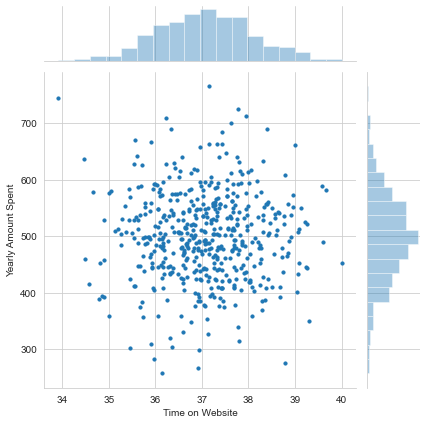

In [46]:
sns.jointplot(data=customers, x='Time on Website',y='Yearly Amount Spent',s=10)
plt.show()

#### Compare the Time on Website and Yearly Amount Spent columns

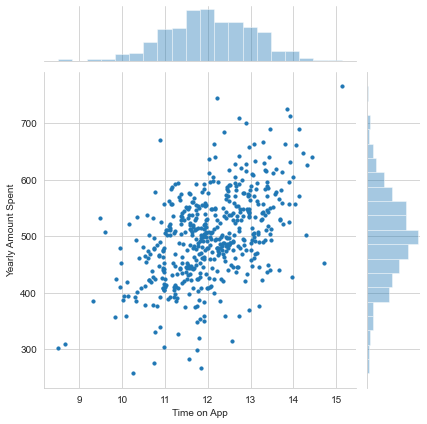

In [47]:
sns.jointplot(data=customers, x='Time on App',y='Yearly Amount Spent',s=10)
plt.show()

#### Compare Time on App and Length of Membership

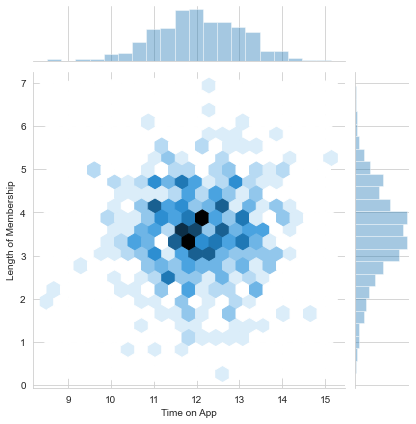

In [112]:
sns.jointplot(data=customers, kind ='hex', x='Time on App',y='Length of Membership')
plt.show()

#### Compare Yearly spend and length of membership

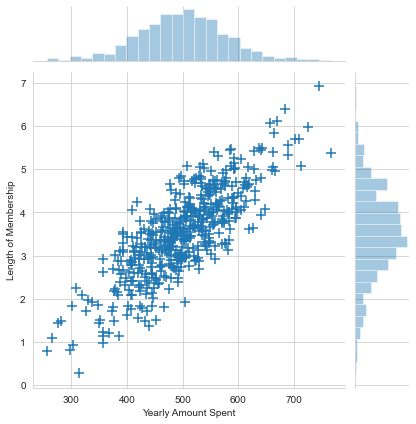

In [54]:
sns.jointplot(data=customers, x='Yearly Amount Spent',y='Length of Membership'
             ,marker="+", s=100, marginal_kws=dict(bins=25))
plt.show()

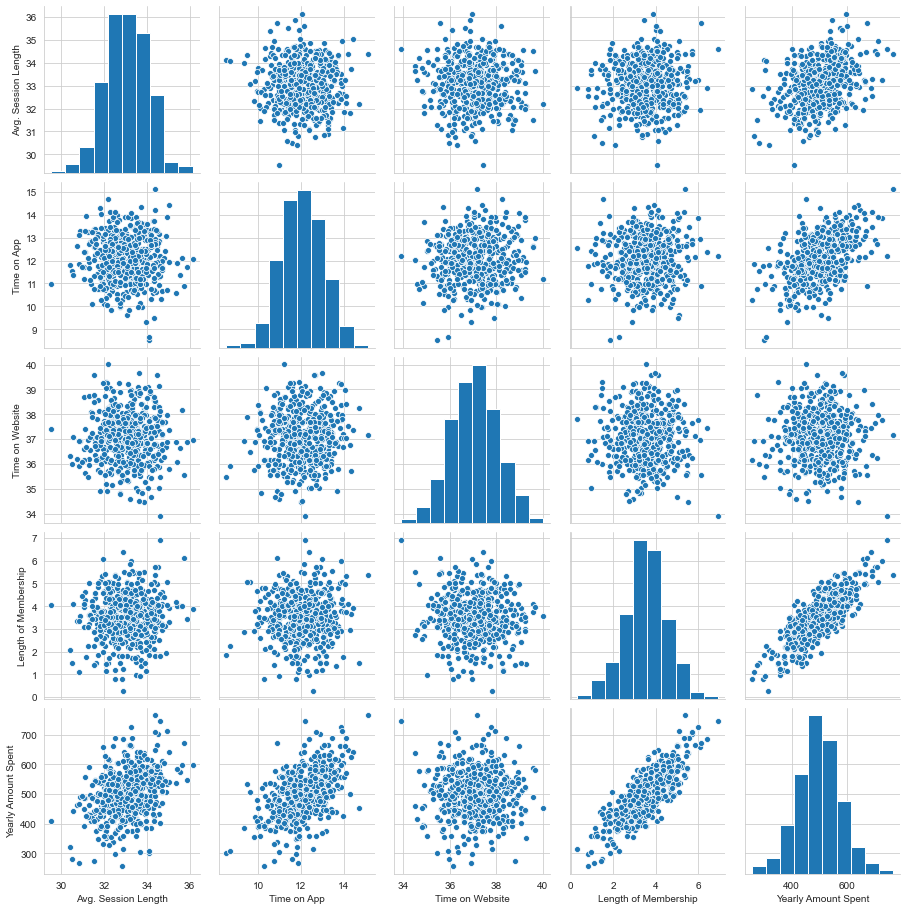

In [45]:
sns.pairplot(data=customers)
plt.show()

#### Linear model of Yearly Amount Spent vs. Length of Membership

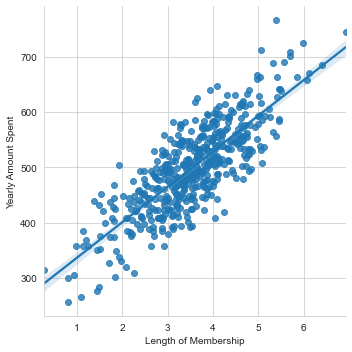

In [69]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)
plt.show()

In [81]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


#### Predict yearly spent based on numerical data

In [82]:
X = customers[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [83]:
lm = LinearRegression()

In [84]:
lm.fit(X_train, y_train)

LinearRegression()

In [89]:
cdf = pd.DataFrame(lm.coef_ , index = X.columns, columns = ['Coefficient'])

In [90]:
cdf

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### Measure performance

In [91]:
predictions = lm.predict(X_test)

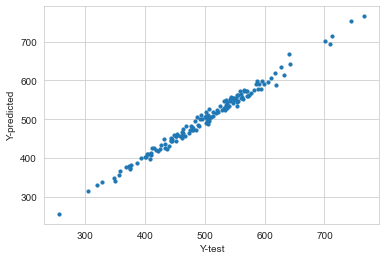

In [110]:
plt.scatter(y_test, predictions,s=10)
plt.xlabel('Y-test')
plt.ylabel('Y-predicted')
plt.show()

#### Residuals histogram

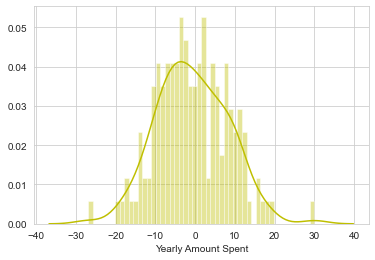

In [121]:
sns.distplot((y_test-predictions),bins=50,color ='y')
plt.show()

In [115]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430847
MSE: 79.81305165097461
RMSE: 8.933815066978642


In [122]:
cdf

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### CONCLUSION - Company should focus on further app development along with incentivizing longer memberships.  Perhaps provide rewards for each year of continued membership